<a href="https://colab.research.google.com/github/jinglescode/meditorch/blob/master/demo/unet_resnet_drishti_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages

In [1]:
!pip install patool

     |████████████████████████████████| 81kB 6.5MB/s 


In [2]:
!pip install --index-url https://test.pypi.org/simple/ meditorch==0.0.dev24

Looking in indexes: https://test.pypi.org/simple/


# Data

In [3]:
from meditorch.datasets import Drishti
from torch.utils.data import DataLoader

trainset_drishti = Drishti('./temp_data', train=True)
valset_drishti = Drishti('./temp_data', train=False)

batch_size = 5

dataloaders_drishti = {
    'train': DataLoader(trainset_drishti, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(valset_drishti, batch_size=batch_size, shuffle=False, num_workers=0)
}

0it [00:00, ?it/s]

100%|█████████▉| 350584832/350597534 [00:44<00:00, 8520198.01it/s]

Extracting ./temp_data/Drishti/Drishti-GS1_files.rar to ./temp_data/Drishti
patool: Extracting ./temp_data/Drishti/Drishti-GS1_files.rar ...
patool: running /usr/bin/unrar x -- /content/temp_data/Drishti/Drishti-GS1_files.rar
patool:     with cwd='./temp_data/Drishti'
patool: ... ./temp_data/Drishti/Drishti-GS1_files.rar extracted to `./temp_data/Drishti'.
Finished download and extract
Extracting data from ./temp_data/Drishti/Drishti-GS1_files/Drishti-GS1_files/Training


350601216it [01:00, 8520198.01it/s]                               

Completed extracting `data` and `targets`.
Extracting data from ./temp_data/Drishti/Drishti-GS1_files/Drishti-GS1_files/Test
Completed extracting `data` and `targets`.


In [4]:
from meditorch.nn.models import UNetResNet
from torchsummary import summary

model = UNetResNet(in_channel=3, n_classes=2)

print(model)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth

  0%|          | 0.00/44.7M [00:00<?, ?B/s]
 22%|██▏       | 9.91M/44.7M [00:00<00:00, 104MB/s]
 47%|████▋     | 20.9M/44.7M [00:00<00:00, 107MB/s]
 73%|███████▎  | 32.4M/44.7M [00:00<00:00, 111MB/s]
 97%|█████████▋| 43.5M/44.7M [00:00<00:00, 113MB/s]
100%|██████████| 44.7M/44.7M [00:00<00:00, 112MB/s]

UNetResNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

Epoch 1/50:
	LR: 0.0001
	train-> bce: 0.033032, dice: 0.475006, loss: 0.254019
	val-> bce: 0.035371, dice: 0.476709, loss: 0.256040
	Saving best model, epoch loss 0.25603992389697655 < best loss 10000000000.0
	0m 6s
----------
Epoch 2/50:
	LR: 0.0001
	train-> bce: 0.029792, dice: 0.422164, loss: 0.225978
	val-> bce: 0.031448, dice: 0.410728, loss: 0.221088
	Saving best model, epoch loss 0.22108816136332118 < best loss 0.25603992389697655
	0m 6s
----------
Epoch 3/50:
	LR: 0.0001
	train-> bce: 0.023622, dice: 0.352112, loss: 0.187867
	val-> bce: 0.025426, dice: 0.315128, loss: 0.170277
	Saving best model, epoch loss 0.1702770687201444 < best loss 0.22108816136332118
	0m 6s
----------
Epoch 4/50:
	LR: 0.0001
	train-> bce: 0.018719, dice: 0.216090, loss: 0.117404
	val-> bce: 0.029474, dice: 0.197681, loss: 0.113577
	Saving best model, epoch loss 0.11357730305662342 < best loss 0.1702770687201444
	0m 6s
----------
Epoch 5/50:
	LR: 0.0001
	train-> bce: 0.020844, dice: 0.126631, loss: 0.0737

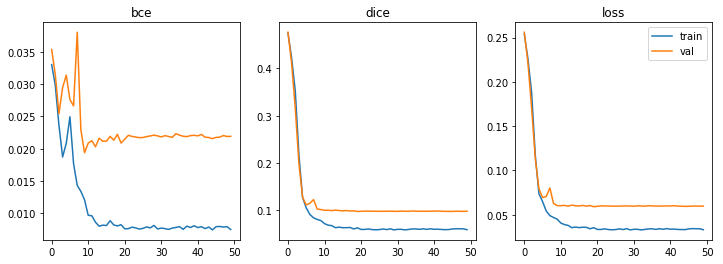

In [7]:
import torch.optim as optim
from torch.optim import lr_scheduler
from meditorch.nn import Trainer

optimizer_func = optim.Adam(model.parameters(), lr=1e-4)

lr_scheduler = lr_scheduler.StepLR(optimizer_func, step_size=10, gamma=0.1)

trainer = Trainer(model, optimizer=optimizer_func, scheduler=lr_scheduler)

trainer.train_model(dataloaders_drishti, num_epochs=50)

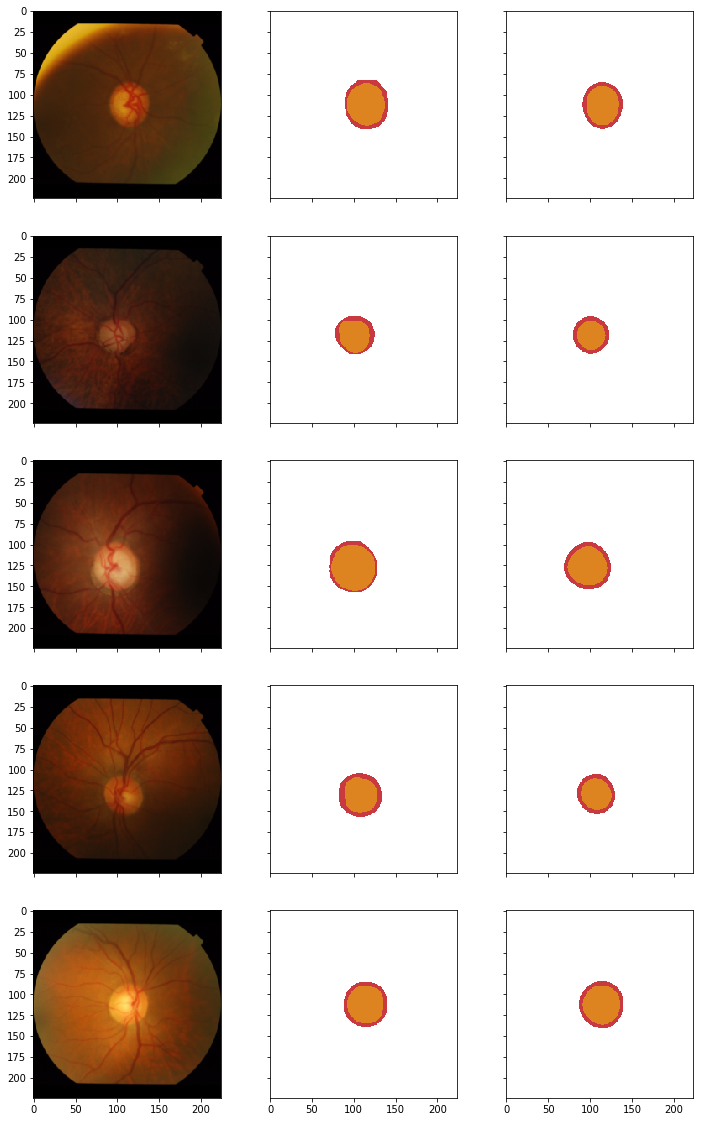

In [8]:
from meditorch.utils.plot import plot_image_truemask_predictedmask

images, masks = next(iter(dataloaders_drishti['val']))
preds = trainer.predict(images)
plot_image_truemask_predictedmask(images, masks, preds)